In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
paris_data = pd.read_csv("../Data/full_paris_emolex_modified.csv")
gnd_data =  pd.read_csv("../Data/full_gnd_emolex_modified.csv")

In [3]:
emotions = ["positive", "negative", "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

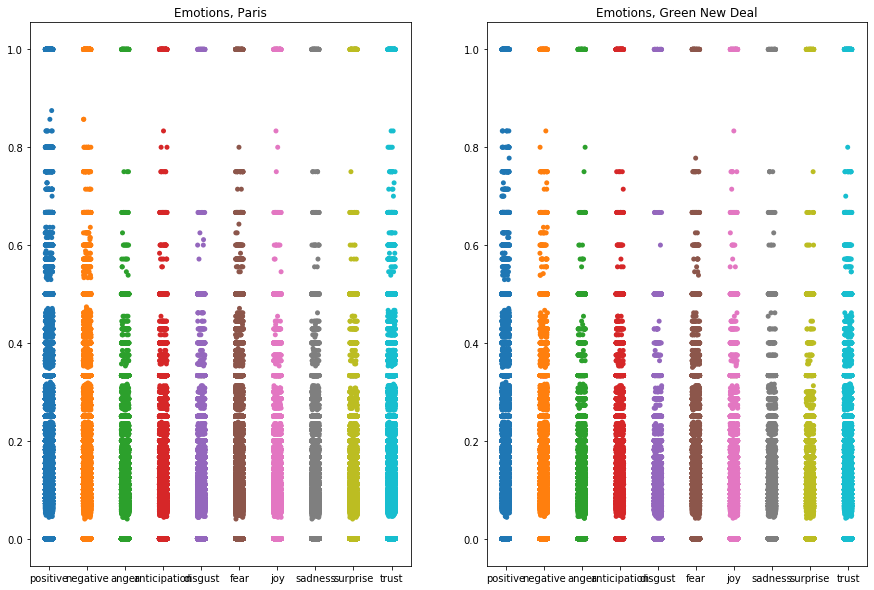

In [4]:
fig,ax = plt.subplots(1,2, figsize = (15,10))
sns.stripplot(data = paris_data[emotions], ax = ax[0])
ax[0].set_title("Emotions, Paris")
sns.stripplot(data = gnd_data[emotions], ax = ax[1])
ax[1].set_title("Emotions, Green New Deal")
plt.show()

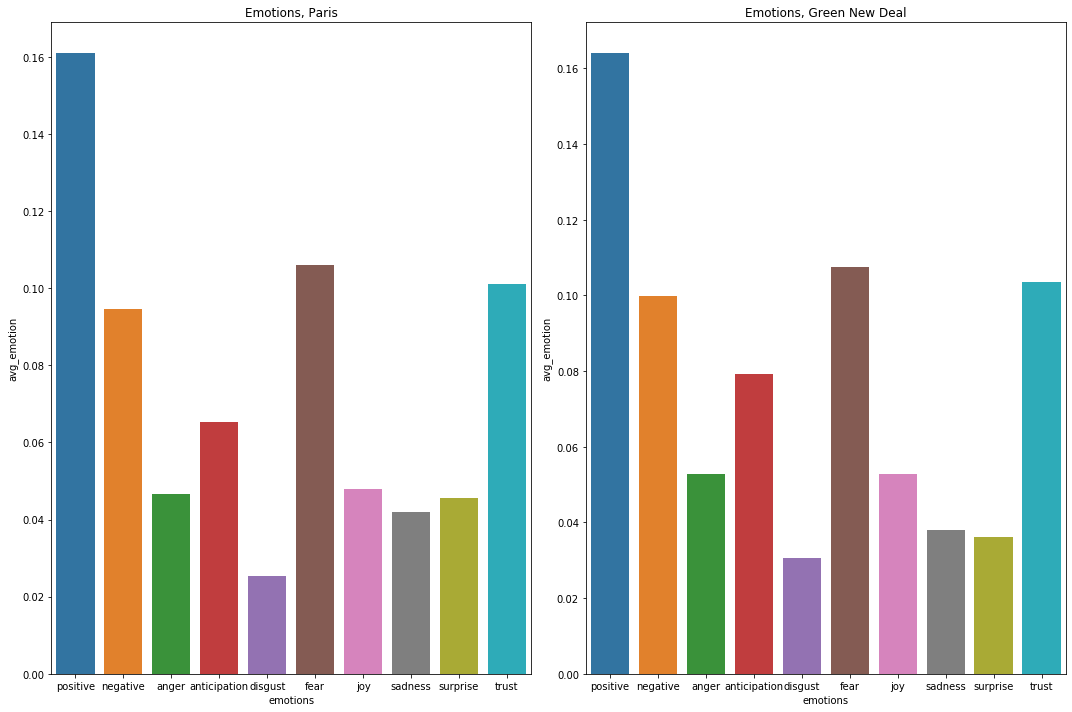

In [5]:
fig,ax = plt.subplots(1,2, figsize = (15,10))
paris_emotions = paris_data[emotions].mean(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="avg_emotion")
gnd_emotions = gnd_data[emotions].mean(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="avg_emotion")
sns.barplot(x="emotions", y="avg_emotion", data=paris_emotions, ax = ax[0])
sns.barplot(x="emotions", y="avg_emotion", data=gnd_emotions, ax = ax[1])
ax[0].set_title("Emotions, Paris")
ax[1].set_title("Emotions, Green New Deal")
plt.tight_layout()
plt.show()

In [6]:
vec = CountVectorizer(max_features = 10000) #best way to do this?
matrix = matrix = vec.fit_transform(paris_data['full_text'])
vocab = vec.get_feature_names()

In [7]:
vocab_df = pd.DataFrame(matrix.toarray(), columns=vocab)
vocab_df.head()

,00,000,04,05,06,08,09,0n2geflmhd,10,100,...,être,último,über,œuvre,για,на,по,पर,கள,லந
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
vocab_df["trump"].value_counts()

0    59603
1     7589
2      594
3       69
4        9
5        2
Name: trump, dtype: int64

In [9]:
def get_topics(df, vocab_df, topic, name):
    name_word = name + "_word"
    df[name_word] = vocab_df[topic].sum(axis = 1)
    df[name] = df[name_word].apply(lambda x: 1 if x > 0 else 0)
    return df[name].sum()

In [10]:
paris_topic_1 = ["trump", "policy", "lead","people", "know","withdraw", "deal", "pull", "sign", "time"]
paris_topic_2 = ["energy", "environment", "party", "oneplanetsummit", "finance", "renewable", "adaptation"]
paris_topic_3 = ["commitment", "today", "leadership", "tackle", "challenge", "ensure", "sustainable", "investor"]
paris_topic_4 = ["impact", "news", "adapt", "life", "ability", "adverse", "administration", "environmental", "health", "private", "food", "tech"]
paris_topic_5 = ["talk", "reduce", "commit", "gas", "cut", "pledge", "greenhouse", "progress", "adopt", "message", "initiative", "reduction"]
paris_topic_6 = ["fuel", "fossil", "withdrawal", "avoid", "discuss", "face", "rule", "speak", "funding", "society", "generation", "listen", "promise", "humanity"]
paris_topic_7 = ["temperature", "limit", "warm", "record", "sea", "century", "extreme", "home"]
paris_topic_8 = ["new", "makeourplanetgreatagain", "find", "major", "fund", "develop", "technology", "sector", "poor", "benefit", "raise", "research"]
paris_topic_9 = ["cop23", "man", "tweet", "american", "disaster", "ice", "hot", "fake", "truth", "million", "blog", "die", "cold", "spend"]
paris_topic_10 = ["auspol", "kill", "ecosystem", "ratify", "pact", "dead", "era", "breach", "urgent", "adoption", "folk"]

In [11]:
topics = [paris_topic_1, paris_topic_2,paris_topic_3,paris_topic_4,paris_topic_5,paris_topic_6,paris_topic_7,paris_topic_8,paris_topic_9,paris_topic_10]
for idx, topic in zip(range(len(topics)), topics):
    name = "topic"+str(idx+1)
    count = get_topics(paris_data, vocab_df, topic, name)
    print(name, count)

topic1 17524
topic2 8429
topic3 5476
topic4 7801
topic5 5749
topic6 4707
topic7 3281
topic8 6295
topic9 5475
topic10 3231


In [12]:
def make_indep(row):
    word_topics = ["topic1_word", "topic2_word","topic3_word","topic4_word","topic5_word","topic6_word","topic7_word","topic8_word","topic9_word","topic10_word"]
    topic_cols = ["topic1", "topic2","topic3","topic4","topic5","topic6","topic7","topic8","topic9","topic10"]
    if sum([row[name] for name in topic_cols]) > 1:
        real_topic =row["big_top"].strip("_word") 
        row[real_topic] = 1
        for topic in topic_cols: 
            if topic != real_topic: 
                row[topic] = 0
    return row

In [13]:
word_topics = ["topic1_word", "topic2_word","topic3_word","topic4_word","topic5_word","topic6_word","topic7_word","topic8_word","topic9_word","topic10_word"]
paris_data["big_top"] = paris_data[word_topics].idxmax(axis = 1)
paris_data = paris_data.apply(make_indep, axis = 1)

In [14]:
topic_cols = ["topic1", "topic2","topic3","topic4","topic5","topic6","topic7","topic8","topic9","topic10"]

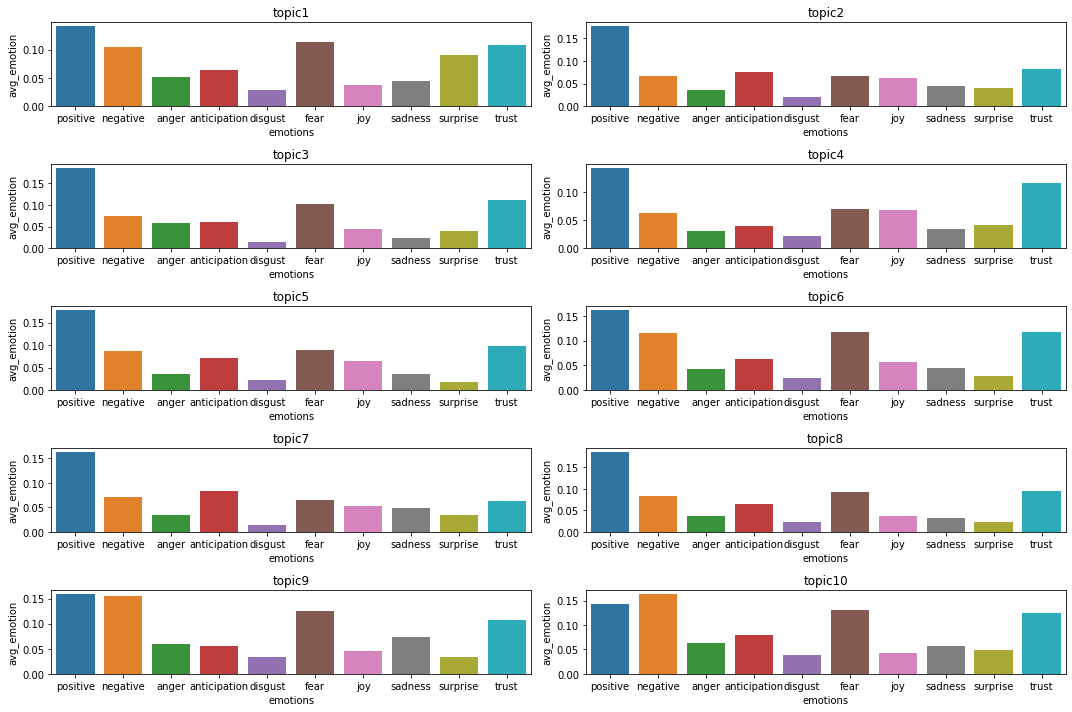

In [15]:
fig, ax = plt.subplots(5,2, figsize=(15,10))
row = 0
col = 0

for topic in topic_cols:
    df_temp = paris_data[paris_data[topic] == 1]
    overall_emotions = df_temp[emotions].mean(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="avg_emotion")
    sns.barplot(x="emotions", y="avg_emotion", data=overall_emotions, ax = ax[row][col])
    ax[row][col].set_title(str(topic))
    if col < 2:
        col += 1
    if col == 2:
        col = 0
        row += 1 
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
def prep_for_plotting(df):
    df = df.copy()
    df["created_at"] = pd.to_datetime(df["created_at"])
    df = df.groupby('created_at').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})
    n = df.resample('W').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})
    n['num_tweets'] = n['id_str']
    n['average_sentiment'] = (n['positive'] + -n['negative'])/2
    dd = n[['num_tweets','average_sentiment']]
    return dd

In [27]:
from pandas import plotting

def plot_multi(data, title, cols=None, spacing=.1, **kwargs):
    
    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel("Number of Tweets")
    lines, labels = ax.get_legend_handles_labels()
    
    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel("sentiment intensity")

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    plt.title('Paris Agreement Number of Tweets and Average Sentiment Aggregated by Week')
    ax.legend(lines, labels, loc=0)
    plt.show()
    return ax

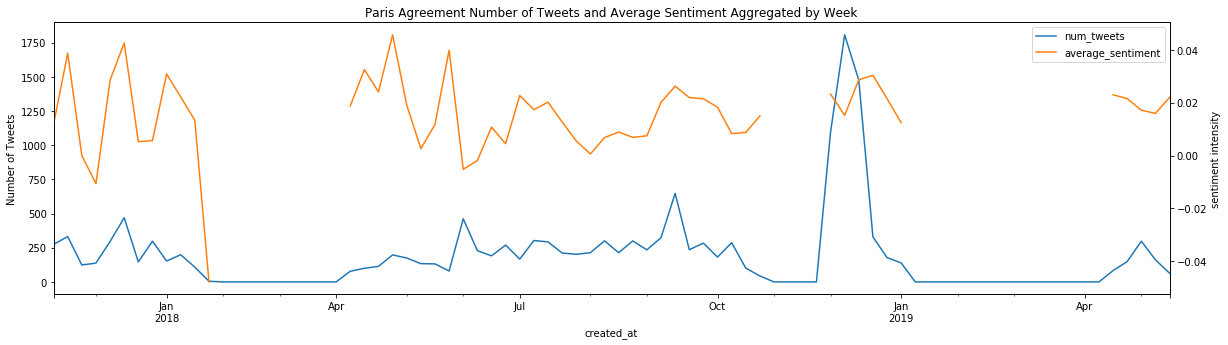

In [28]:
plot_multi(prep_for_plotting(paris_data[paris_data['topic1'] == 1]), "Paris Topic 1", figsize=(20, 5))

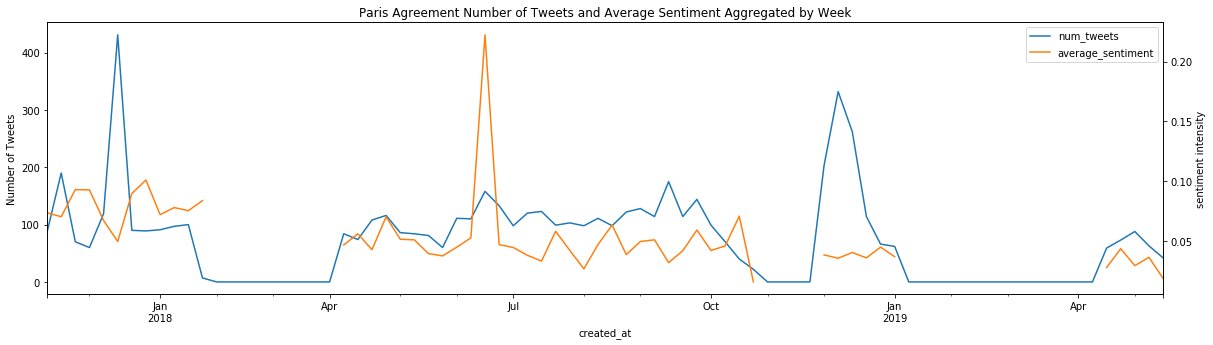

In [29]:
plot_multi(prep_for_plotting(paris_data[paris_data['topic2'] == 1]), "Paris Topic 2", figsize=(20, 5))

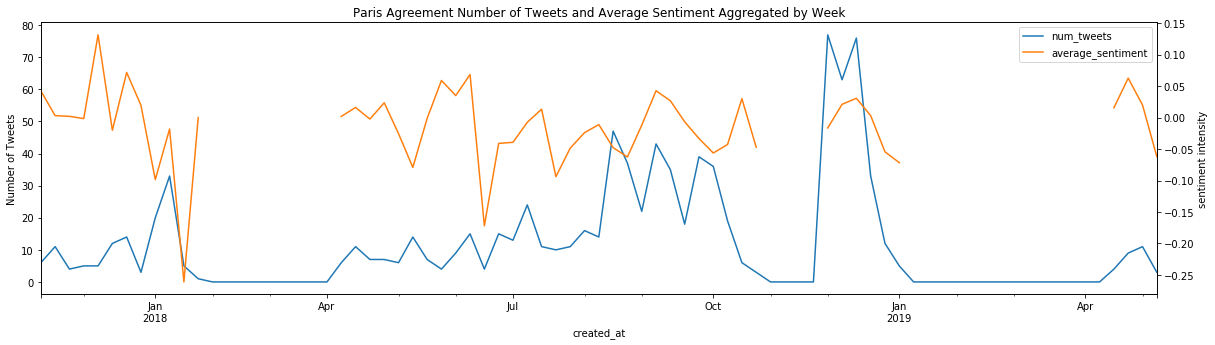

In [30]:
plot_multi(prep_for_plotting(paris_data[paris_data['topic10'] == 1]), "Paris Topic 10", figsize=(20, 5))

#### Basic Analysis with Sklearn

In [17]:
linear_regression_analysis = {}
for topic in topic_cols:
    df_temp = paris_data[paris_data[topic] == 1]
    mult_mod = LinearRegression().fit(df_temp[emotions], df_temp[["retweet_count", "favorite_count"]])
    linear_regression_analysis[topic] = {"model":mult_mod, "r2": mult_mod.score(df_temp[emotions], df_temp[["retweet_count", "favorite_count"]])}

In [18]:
r2 = pd.DataFrame.from_dict({topic: topic_cols,"r2":[d["r2"] for d in linear_regression_analysis.values()]})
display(r2)

,topic10,r2
0,topic1,0.000744
1,topic2,0.001252
2,topic3,0.001025
3,topic4,0.000823
4,topic5,0.002550
5,topic6,0.001495
6,topic7,0.013829
7,topic8,0.002154
8,topic9,0.002919
9,topic10,0.007249


#### Regression analysis with statsmodels

In [19]:
from statsmodels.multivariate.manova import MANOVA

#### MANOVA Assumption Checking
1. Dependent variables are continuous -- yes
2. Categorical variables are independent -- this may not be entirely true? But it depends on how the emotion model was developed.
3. Ensured that tweets were not included in multiple topics, hmm not sure if this applies here
4. Adequate sample size - yes
5. Based on stripplots -- no outliers
6. Multivariate Normality

In [1]:
# for emotion in emotions:
    

7.
8.
9.

In [ ]:
# sm_results = {}
# for topic in topic_cols:
#     df_temp = paris_data[paris_data[topic] == 1]
#     model = MANOVA.from_formula('retweet_count + favorite_count ~ positive + negative + anger + anticipation + disgust + fear + joy + sadness + surprise + trust', data = df_temp)
#     sm_results[topic] = model.mv_test()

In [ ]:
# for topic in topic_cols:
#     print(topic)
#     print(sm_results[topic])